In [33]:
from os import listdir
from statistics import mean, stdev
from typing import List

import matplotlib.pyplot as plt

from src.paths import DATASET_DIR
from src.utils import download_dataset_from_dropbox, load_image


def plot_distribution(items: List, title: str, num_bins: int = 6) -> None:
    plt.hist(items, bins=num_bins, edgecolor="black")
    plt.xlabel(title)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {title}")
    plt.show()

In [34]:
download_dataset_from_dropbox(
    url=r"https://www.dropbox.com/s/1eb7fx9bqr85cfo/data_set_VU_test1.zip?raw=1")

Dataset already exists


In [35]:
widths, heights, pixels = [], [], []

filenames = listdir(DATASET_DIR)
for filename in filenames:
    image = load_image(DATASET_DIR / filename)
    height, width, _ = image.shape
    widths.append(width)
    heights.append(height)
    pixels.append(width * height)

print("Number of files in the dataset:", len(filenames))
print(f"Width \tMIN {min(widths)} \tMAX {max(widths)} \tMEAN {mean(widths):.3f} \tSTD {stdev(widths):.3f}")
print(f"Height \tMIN {min(heights)} \tMAX {max(heights)} \tMEAN {mean(heights):.3f} \tSTD {stdev(heights):.3f}")
print(f"Pixels \tMIN {min(pixels)} \tMAX {max(pixels)} \tMEAN {int(mean(pixels))} \tSTD {int(stdev(pixels))}")

Number of files in the dataset: 8091
Width 	MIN 164 	MAX 500 	MEAN 457.872 	STD 68.659
Height 	MIN 127 	MAX 500 	MEAN 397.252 	STD 75.670
Pixels 	MIN 55008 	MAX 250000 	MEAN 177720 	STD 22276


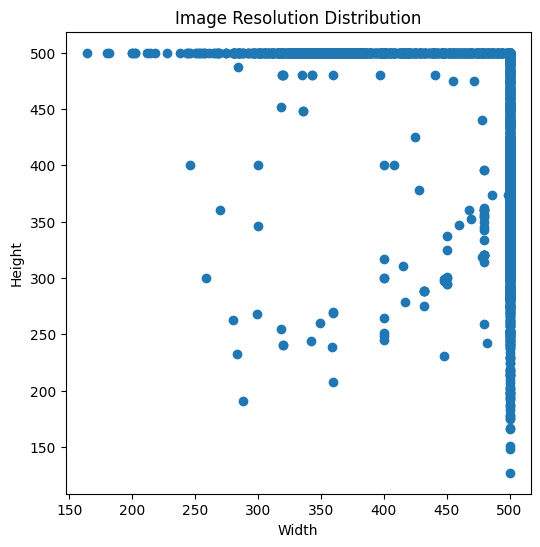

In [36]:
plt.figure(figsize=(6, 6))
plt.scatter(widths, heights)
plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Image Resolution Distribution");

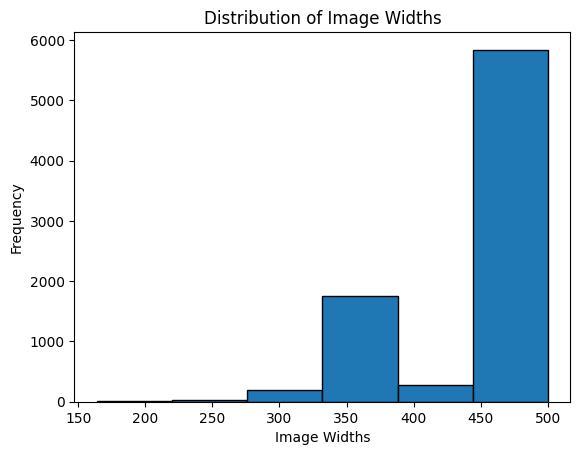

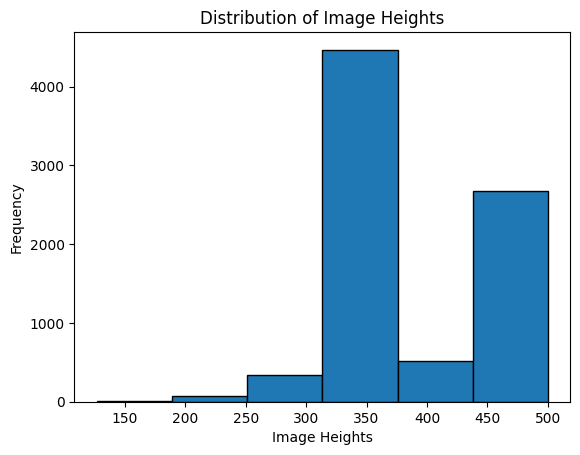

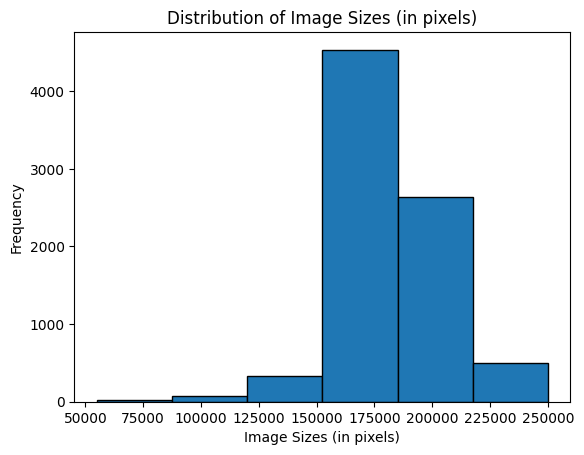

In [37]:
plot_distribution(widths, title="Image Widths")
plot_distribution(heights, title="Image Heights")
plot_distribution(pixels, title="Image Sizes (in pixels)")